# Модуль: Unsupervised Learning

<span style="font-size: 14pt">ФИВТ, АПТ, Курс по машинному обучению, Весна 2018, семинар 13 </span>

<span style="color:blue; font-size: 12pt">Alexey Romanenko, </span>
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

# Методы сжатия размерности
<h3> Plan </h3>

* ** Напоминание лекции ** 
 - Пространство признаков: проблемы при большой размерности d
 - Мультиколлинеарность


* **PCA, SVD**
 - Разложение матриц: SVD и PCA
 - Реализация PCA
 - Применение PCA для задачи классификации
  
* **tSNE**
 - Идея tSNE
 - tSNE для MNIST
 
 
* **Итоги курса и аттестация**

In [15]:
import os
import time
import warnings
import datetime
import numpy as np
import pandas as pd
import random as rnd
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier

import pylab

from matplotlib import pyplot
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

# sns.set_context("notebook", font_scale=1.5)
import random
from IPython.display import Image, SVG

%matplotlib inline

<h1 align="center"> Напоминание с лекции </h1>
** Вопросы **
* Что такое обучение без учителя?
* Какие проблемы возникают при обучении алгоритмов из-за большой размерности пространства признаков?
* Что такое проблема мультиколлинеарности?
* Какие пути решения проблемы мультиколлинеарности вы знаете?

### Мультиколлинеарность

## $$ g(x, \alpha) = \sum_{i}^{n} \alpha_i f_i(x) $$
## $$ Q(\alpha) = \| F\alpha - y \|^2 $$

Solution

## $$ \alpha^{*} = (F^{T}F)^{-1}F^{T}y = F^{+}y $$
## $$ Q(\alpha^{*}) = \| P_{F}y - y \|^2 $$
## $$ P_{F} = FF^{+} $$

See <a href='http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf'> К.В. Воронцов, Методы машинного обучения по прецедентам </a>
* глава 5.3 Линейная регрессия

### Мультиколлинеарность
#### Пример

In [16]:
from numpy.linalg import inv, norm, eigvals, svd
from scipy import diag
from scipy.optimize import fmin
from sklearn.datasets import make_regression

In [17]:
### Linear Regression
d = 100
X, Y = make_regression(n_samples=200, n_features=d, effective_rank=1, noise=0)

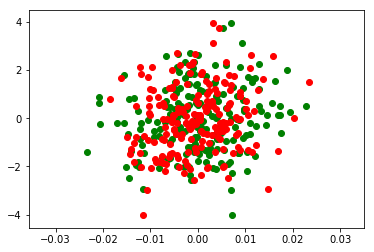

In [18]:
pylab.scatter(X[:, 0], Y, c="green")
pylab.scatter(X[:, 1], Y, c="red")

In [7]:
F_plus = np.dot(inv(np.dot(X.T, X)), X.T)
alpha = np.dot(F_plus, Y)
print ("Alpha:", alpha)
print ("Q:", norm(np.dot(X, alpha) - Y))

Alpha: [-1.55287580e-06  9.59329554e-07 -3.88517947e-06  1.87997694e-06
 -3.54431359e-06  4.43425961e-07  1.55584166e-06  3.20085564e-06
 -3.50916525e-06  3.71533312e+01 -1.52902248e-06  1.60354944e-06
 -2.16946682e-06  1.81298492e-06 -2.27853707e-06 -5.31292244e-07
  1.34190395e-06  1.17313948e-06 -4.12048530e-06  3.45461194e-06
  1.82535587e-07 -4.41972952e-06  7.68207428e-07  1.28827742e-06
 -8.38166670e-07  2.89029140e-06 -5.14035492e-07 -3.63365689e-06
 -2.76846220e-06  3.26377540e-06  1.65240453e-06  2.52266000e-06
 -2.05587276e-06  3.61572029e-06 -4.20142896e-07 -2.47503522e-06
 -1.83133670e-06 -3.53434280e-06  1.69459781e-07  3.48155208e-06
  1.08149834e-07 -6.31432158e-07 -6.43414751e-07 -1.12085218e-06
  1.27383828e-08  9.30266264e+00  1.81416908e-07  5.74620048e+01
 -1.76364665e-06 -1.67396138e-06 -1.00651869e-06 -1.71379725e-07
 -2.63866059e-06  6.11846190e-07  1.02939157e-06  2.15319642e-06
  4.69111910e-07 -1.09173016e-06 -4.23762685e-07  1.01742171e-06
  3.34476226e-07  

### Problem: Condition Number

In [8]:
eigen_values = eigvals(np.dot(X.T, X))
# print eigen_values

print  ('cond_number:', eigen_values.max() / eigen_values.min())

cond_number: 1588878652.7909808


** Вопрос: ** что происходит с числом обусловленности матрицы регрессии, когда добавляется регуляризатор? 

---------
<h1 align="center"> PCA, SVD 

## Задача PCA

#### PCA

## $$ \| G U^{T} - F \|^2 \to \min_{G, U} $$

$$ dim F = (\ell \times n),~~~ dim G = (\ell \times m),~~~ dim U = (n\times m) $$ 
---------
<img src="pic/fig_pca_PCA.png" width="600">

#### SVD

## $$ F = V D U^{T} $$


## $$ F^{+} = U D^{-1} V^{T} $$

**Воспрос**: Как связаны решение задачи PCA и SVD? 

Если $m = n$, тогда 
## $$ F = G U^{T} = V D U^{T} $$

Если $m\geq rank(F)$

**Воспрос**: Как связаны собственные числа $\lambda_1,\dots, \lambda_m$, отвечающие главным компонентам, и ошибка приближения матрицы признаков (explained variance) 
## $$\| G U^{T} - F \|^2 ?$$

In [9]:
# U --> already transposed (U^T)
V, D, U = svd(X, full_matrices=False)

#### Compare eigen values

In [10]:
# Разберёмся с размерностями матриц
print (X.shape, V.shape, D.shape, U.shape)

(200, 100) (200, 100) (100,) (100, 100)


In [11]:
# Ошибка приближения (retained variance) и её связь собственными значениями
print (norm(np.dot(np.dot(V, diag(D)), U) - X))
print( "eigen values:", np.diagonal(np.dot(diag(D), diag(D))))
print ("difference:", np.diagonal(np.dot(diag(D), diag(D))) - eigen_values[list(reversed(list(eigen_values.argsort())))])

1.0692786548957599e-14
eigen values: [1.00000000e+00 4.04952051e-01 1.75161666e-01 1.37248625e-01
 1.12332279e-01 9.19698603e-02 7.52985530e-02 6.16492410e-02
 5.04741295e-02 4.13247221e-02 3.38338208e-02 2.77007896e-02
 2.26794883e-02 1.85683946e-02 1.52025157e-02 1.24467671e-02
 1.01905510e-02 8.34331749e-03 6.83093061e-03 5.59269296e-03
 4.57890972e-03 3.74889421e-03 3.06933498e-03 2.51295894e-03
 2.05743676e-03 1.68448675e-03 1.37914111e-03 1.12914524e-03
 9.24465929e-04 7.56888686e-04 6.19688044e-04 5.07357659e-04
 4.15389318e-04 3.40092009e-04 2.78443787e-04 2.27970491e-04
 1.86646452e-04 1.52813190e-04 1.25112858e-04 1.02433745e-04
 8.38656570e-05 6.86633925e-05 5.62168310e-05 4.60264484e-05
 3.76832688e-05 3.08524510e-05 2.52598505e-05 2.06810164e-05
 1.69321841e-05 1.38628999e-05 1.13499824e-05 9.29257967e-06
 7.60812075e-06 6.22900243e-06 5.09987585e-06 4.17542520e-06
 3.41854902e-06 2.79887121e-06 2.29152193e-06 1.87613948e-06
 1.53605309e-06 1.25761390e-06 1.02964718e-06 8.

# Reminder: Linear Regression Solution over SVD decomposition

In [13]:
V, d, U = svd(X, full_matrices=False)
D_inv = diag(1 / d)
D = diag(d)

F_svd_plus = np.dot(U.T, np.dot(D_inv, V.T))
alpha_svd = np.dot(F_svd_plus, Y)
print (alpha_svd)
print ('SSE: ', norm(np.dot(X, alpha_svd) - Y))

[ 2.95585778e-12  1.81898940e-12  0.00000000e+00 -3.18323146e-12
 -1.81898940e-12  0.00000000e+00  1.36424205e-12  1.09139364e-11
  7.27595761e-12  3.71533331e+01 -9.09494702e-13  6.36646291e-12
 -1.36424205e-11  9.09494702e-13  0.00000000e+00 -9.09494702e-13
 -9.09494702e-12  4.54747351e-12 -5.00222086e-12 -1.27329258e-11
 -1.09139364e-11 -7.27595761e-12  1.36424205e-11  1.09139364e-11
 -1.18234311e-11  1.81898940e-12  3.63797881e-12 -5.45696821e-12
  1.13686838e-12  4.54747351e-13  1.63709046e-11  4.54747351e-12
  7.04858394e-12  9.09494702e-12  3.63797881e-12  1.27329258e-11
 -1.00044417e-11 -2.27373675e-12 -4.54747351e-12  9.09494702e-12
  3.63797881e-12 -8.18545232e-12 -1.45519152e-11  0.00000000e+00
 -4.54747351e-13  9.30266137e+00 -3.18323146e-12  5.74620072e+01
 -5.45696821e-12 -1.09139364e-11 -4.09272616e-12  1.09139364e-11
  5.45696821e-12  0.00000000e+00  0.00000000e+00  6.82121026e-12
  1.09139364e-11  7.27595761e-12 -7.27595761e-12 -3.63797881e-12
  1.00044417e-11  3.63797

#### Truncated SVD

In [14]:
V, d, U = svd(X, full_matrices=False)
D_inv = diag([[(1 / d)[0]]+ [0.0]*(len(d)-1)][0])
D = diag([[d[0]]+ [0.0]*(len(d)-1)][0])

print ("Truncated D:")
print (D)
print()

# print "SVD approximation norm:", norm(np.dot(np.dot(V, D), U) - X)

F_svd_plus = np.dot(U.T, np.dot(D_inv, V.T))
alpha_svd = np.dot(F_svd_plus, Y)
print (alpha_svd)
print (norm(np.dot(X, alpha_svd) - Y))

Truncated D:
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

[-0.16192716 -0.36310172 -0.25613479 -0.65045771 -0.11918459 -0.54314817
 -0.47195962  0.32679826 -0.41551517  0.74401623 -1.16566994 -0.13577
 -0.75672879  0.70206893  0.25438629 -0.15336363 -0.46212552  1.89164253
  0.76715518 -0.09414532  0.4678214   0.13202617 -0.14239802 -0.36245232
  0.49414217  0.34293174  0.16884206 -1.16823117 -0.02467535 -0.72891211
 -0.34696893 -0.16381818 -0.32489673 -0.73233884 -1.54377041  0.47742373
  0.02530094 -0.232338    0.22142951 -0.68888001  0.65168645  1.10286153
 -0.00341691 -0.81088559  0.71792999  0.7804941  -0.83186784  0.34316356
 -0.51688735  0.57903184 -0.82957732 -0.68060952 -0.0839216  -1.21409643
 -0.28970748  0.16901462  0.34418051 -0.61993179  0.3994734   0.52411319
  0.64385405  0.49536388 -1.24341582 -0.08423544  0.97185086  0.29666869
 -0.33722587 -0.58839239  1.68

# Реализация PCA

In [ ]:
'''
Performs the Principal Coponent analysis of the Matrix F
Matrix must be n * l dimensions
where n is # features
l is # samples
'''

def PCA(F, varRetained = 0.95, show = False):
    # Input
    #     F - initaial matrix 
    # Compute Covariance Matrix Sigma
    # Input
    (n, l) = F.shape
    Sigma = 1.0 / l * F * np.transpose(F)
    # Compute eigenvectors and eigenvalues of Sigma by SVD
    # U, V - matrix, d - array: Sigma = U * np.diag(d) * V
    U, d, V = посчитать SVD матрицы Sigma

    # compute the value m: number of minumum features that retains the given variance varRetaine
    dTot = np.sum(d)
    var_i = np.array([np.sum(d[: i + 1]) / \
                dTot * 100.0 for i in range(n)])
    m = вычислите необходимое число главных компонент
    print ('%.2f %% variance retained in %m dimensions' % верните число m и точность, которая достигается при этом числе главных компонент)
    # plot the variance plot
    if show:
        plt.plot(var_i)
        plt.xlabel('Number of Features')
        plt.ylabel(' Percentage Variance retained')
        plt.title('PCA $\% \sigma^2 $ vs # features')
        plt.show()

    # compute the reduced dimensional features by projection
    U_reduced = !!!только m главных компонент!!!
    G = !!!вычислить матрицу в преобразованном пространстве!!!

    return G, U_reduced

In [ ]:
# Примените алгоритм к данным MNIST
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.7)

In [ ]:
#################################################################
# PCA of training set
print ('Performing PCA - Principal COmponent Analysis')

Z, U_reduced = PCA(X.T, varRetained = 0.95, show = True)
print (Z)
print (U_reduced)

## PCA for Classifiaction

In [22]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA

from sklearn.model_selection import ShuffleSplit, cross_val_score, train_test_split
from sklearn.pipeline import  Pipeline

from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.7)

C:\Users\rusrom.EUROPE\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [23]:
from sklearn.datasets import load_iris

iris = load_iris()

cv_strategy = ShuffleSplit(iris.data.shape[0], random_state=33, test_size=0.1)

estimator = Pipeline([
    ('reduce_dim', PCA(n_components=2)),
    ('svm', SVC(kernel="linear")),
])
print ("SVM:", cross_val_score(SVC(kernel="linear"), iris.data, iris.target, scoring='accuracy', cv=cv_strategy).mean())
print ("PCA+SVM:", cross_val_score(estimator, iris.data, iris.target, scoring='accuracy', cv=cv_strategy).mean())

SVM: 0.9777777777777779
PCA+SVM: 0.960888888888889


In [25]:
from sklearn.datasets import load_digits

digits = load_digits()

cv_strategy = ShuffleSplit(digits.data.shape[0], random_state=33, test_size=0.2)

estimator = Pipeline([
    ('reduce_dim', PCA(n_components=40)),
    ('svm', SVC(kernel="linear")),
])

for estimator_ in [SVC(kernel="linear"), estimator]:
    scoring = cross_val_score(estimator_, digits.data, digits.target, scoring='accuracy', cv=cv_strategy)
    print (scoring.mean(), scoring.std())

0.9787392567860013 0.007159219903322391
0.9788536449638284 0.007184881375362216


In [35]:
# One more example - eigen faces
from IPython.display import IFrame
IFrame(src="http://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-pyhttp://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py", width=800, height=400)

-------
<h1 align="center">tSNE</h1> 
## Идея tSNE
Laurens, Hinton Visualizing Data using t-SNE, 2008
---------
<img src="pic/Lle_hlle_swissroll.png" width="600">

** Вопросы:**
- Почему PCA не предназначен для данных со сложной нелиненой структурой?
- В чём основаная идея SNE? 
- Какие преимущества tSNE переж SNE?

### Пример
** tSNE превносит дополнительную интепретацию в данные!!! **
http://distill.pub/2016/misread-tsne/

### tSNE vs PCA (MNIST)
http://yann.lecun.com/exdb/mnist/

Используется load_digits для упрощения

Загрузка данных (см выше)

Нарисуем примеры цифр из датасета load_digits

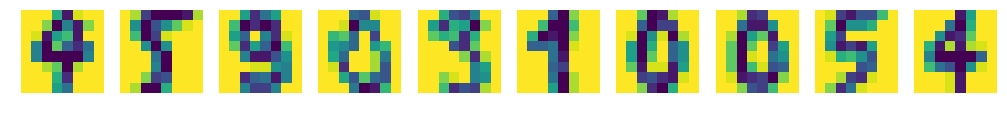

In [26]:
def plot_image(image_id, dataset=X_train, im_size=28):
    pylab.imshow(255-dataset[image_id,:].reshape(im_size, im_size))
    
def plot_grid(image_ids, nrows, ncols, dataset=X_train, im_size=8):
    fig = pyplot.gcf()
    fig.set_size_inches(17.5,15.5)
    for pylab_index, example_id in enumerate(image_ids):
        pylab.subplot(nrows, ncols, pylab_index + 1)
        plot_image(example_id, dataset, im_size)
        pylab.axis('off')
plot_grid(range(10), nrows=1, ncols=10)

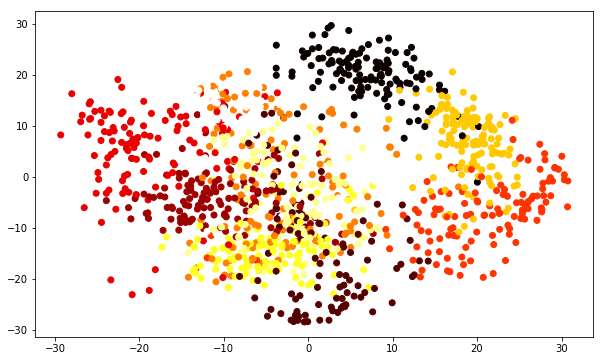

In [28]:
pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
pyplot.figure(figsize=(10, 6))
pylab.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=Y_train, cmap=pyplot.cm.hot)

In [30]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, n_iter=250)

X_tsne = tsne.fit_transform(np.concatenate((X_train, X_test)))
X_train_tsne, X_test_tsne = X_tsne[:len(X_train)], X_tsne[len(X_train):]

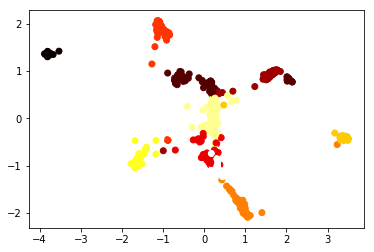

In [31]:
pylab.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=Y_train, cmap=pyplot.cm.hot)

In [32]:
# KNN_PCA2d vs KNN_TSNE2d

knn_pca = KNeighborsClassifier().fit(X_train_pca, Y_train)
y_pca = knn_pca.predict(X_test_pca)
print ('knn pca accuracy_score = %s' % accuracy_score(y_pca, Y_test))

knn pca accuracy_score = 0.6518518518518519


In [34]:
knn_tsne = KNeighborsClassifier().fit(X_train_tsne, Y_train)
y_tsne = knn_tsne.predict(X_test_tsne)
print ('knn tsne accuracy_score = %s' % accuracy_score(y_tsne, Y_test))

knn tsne accuracy_score = 0.9777777777777777


<h1 align="center">Conclusion</h1>  

** Программа зачёта/экзамена**
 * 


**PRO PCA**:
 
 * PCA помогает избавиться от "лишних" размерностей
 * PCA строит оптимальное линейное преобразование
 * PCA применим для больших размерностей
 * существуют ядерные вариант PCA (KernelPCA)

**Cons PCA**
 * если требуется сложное нелинейное преобразование, PCA не работает
 * не подходит для визуализации на двухмерной плоскости при большой размерности исходных пространств

**PRO tSNE**:
 * отлично визуализируют (2D, 3D) данные
 * испольюзуются для предобрабтки данных, анализа структуры данных
       
**Cons tSNE**
  * стохастичность (PCA детерминирован)
  * неинтерпретируемость данных
  * не применим (сложно применим) для новых данных
  * не даёт ответ об оптимальной размерности пространства

** Reference **
- ESL https://web.stanford.edu/~hastie/local.ftp/Springer/OLD/ESLII_print4.pdf
- TSNE http://www.youtube.com/watch?v=RJVL80Gg3lA
- http://distill.pub/2016/misread-tsne/

## <a href="https://github.com/ml-mipt/ml-mipt-part1/blob/master/2018/hw/hw9/"> HW9 </a> 

** Обратная связь ** 
 
* <span style="font-size: 11pt"> <a href="https://goo.gl/forms/kYZuyAQLuwo8szce2"> отзыв </a> о семинаре </span>
  
* <span style="font-size: 11pt"> <a href="https://goo.gl/forms/zeZiu1fSgrpPGp6T2"> отзыв </a> о лекции </span>